In [1]:
import numpy as np
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

2022-10-24 22:03:55.634044: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-24 22:03:55.747852: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-24 22:03:56.160556: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-10-24 22:03:56.160592: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [2]:
# test data is not bound to a variable upon load
(x_data, y_data), (_, _) = tf.keras.datasets.cifar10.load_data()
# set random state should ensure the same validation set for reruns
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size = 0.1, random_state=42**2)

err = tf.keras.losses.SparseCategoricalCrossentropy()

In [3]:
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(45000, 32, 32, 3) (45000, 1)
(5000, 32, 32, 3) (5000, 1)


In [4]:
models = [
    keras.Sequential([
        layers.Flatten(),
        layers.Dense(32, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]),
    keras.Sequential([
        layers.Flatten(),
        layers.Dense(1024, activation="relu"),
        layers.Dense(1024, activation="relu"),
        layers.Dense(1024, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]),
    keras.Sequential([
        layers.Conv2D(64, (4, 4), activation="relu", input_shape=(32, 32, 3)),
        layers.Flatten(),
        layers.Dense(32, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]),
    keras.Sequential([
        layers.Conv2D(64, (4, 4), activation="relu", input_shape=(32, 32, 3)),
        layers.Conv2D(128, (4, 4), activation="relu"),
        layers.Conv2D(128, (4, 4), activation="relu"),
        layers.Flatten(),
        layers.Dense(10, activation="softmax"),
    ]),
    keras.Sequential([
        layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]),
    keras.Sequential([
        layers.Conv2D(256, (3, 3), activation="relu", input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(512, (3, 3), activation="relu"),
        layers.Conv2D(512, (3, 3), activation="relu"),
        layers.Flatten(),
        layers.Dense(256, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]),
    keras.Sequential([
        layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), activation="relu"),
        layers.Conv2D(512, (3, 3), activation="relu"),
        layers.Flatten(),
        layers.Dense(256, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]),
]

2022-10-24 22:03:58.944079: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-24 22:03:58.955851: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-24 22:03:58.956019: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-24 22:03:58.956534: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [5]:
def trainModels(models, epochs):
    models_trained = []
    for model in models:
        model.compile(optimizer="adam",
                  loss=tf.losses.SparseCategoricalCrossentropy(),
                  metrics=["accuracy"])
        train_log = model.fit(
            x_train,
            y_train,
            epochs=epochs,
        )
        models_trained.append(model)
    return models_trained

def saveModels(models, label, dir="Models"):
    for i, model in enumerate(models):
        model.save_weights(f"{dir}/{label}_{i}")

def loadModels(label, dir="Models"):
    for i, model in enumerate(models):
        model.load_weights(f"{dir}/{label}_{i}")

In [6]:
epochs = 20
"""
#comment out the \"\"\" if you want to train the models
#otherwise, use loadModels in the cell below
train_logs = trainModels(models, epochs)
saveModels(models, f"e{epochs}")
"""
train_logs = loadModels(f"e{epochs}")

In [7]:
model_preds = []
model_val_preds = []

for model in models:
        y_pred = model.predict(x_train)
        model_preds.append(y_pred)
        y_val_pred = model.predict(x_val)
        model_val_preds.append(y_val_pred)

 235/1407 [====>.........................] - ETA: 0s

2022-10-24 22:04:00.536840: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


157/157 [==============================] - 0s 601us/step


2022-10-24 22:04:04.188074: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500


157/157 [==============================] - 0s 929us/step


In [8]:
# Generate figures from the predictions
model_train_errors = []
model_errors = []

model_train_acc = []
model_acc = []

for (pred_train, pred_val) in zip(model_preds, model_val_preds):
    model_train_errors.append(err(y_train, pred_train).numpy())
    model_errors.append(err(y_val, pred_val).numpy())
    model_train_acc.append((y_train.max(axis=1)==pred_train.argmax(axis=1)).sum()/y_train.shape[0])
    model_acc.append((y_val.max(axis=1)==pred_val.argmax(axis=1)).astype(int).sum()/y_val.shape[0])
print(model_train_errors, model_errors, model_train_acc, model_acc)

[2.3025787, 2.3026206, 0.31384933, 2.3025901, 0.42883393, 0.16069886, 0.12963626] [2.3027835, 2.3029664, 2.5867355, 2.3028922, 1.5559344, 1.8537629, 1.7021617] [0.10011111111111111, 0.10053333333333334, 0.9032222222222223, 0.10104444444444445, 0.8501555555555556, 0.9478666666666666, 0.9608666666666666] [0.0992, 0.0952, 0.4566, 0.0906, 0.641, 0.6526, 0.673]


In [9]:
font = {'size': 20}

mpl.rc('font', **font)

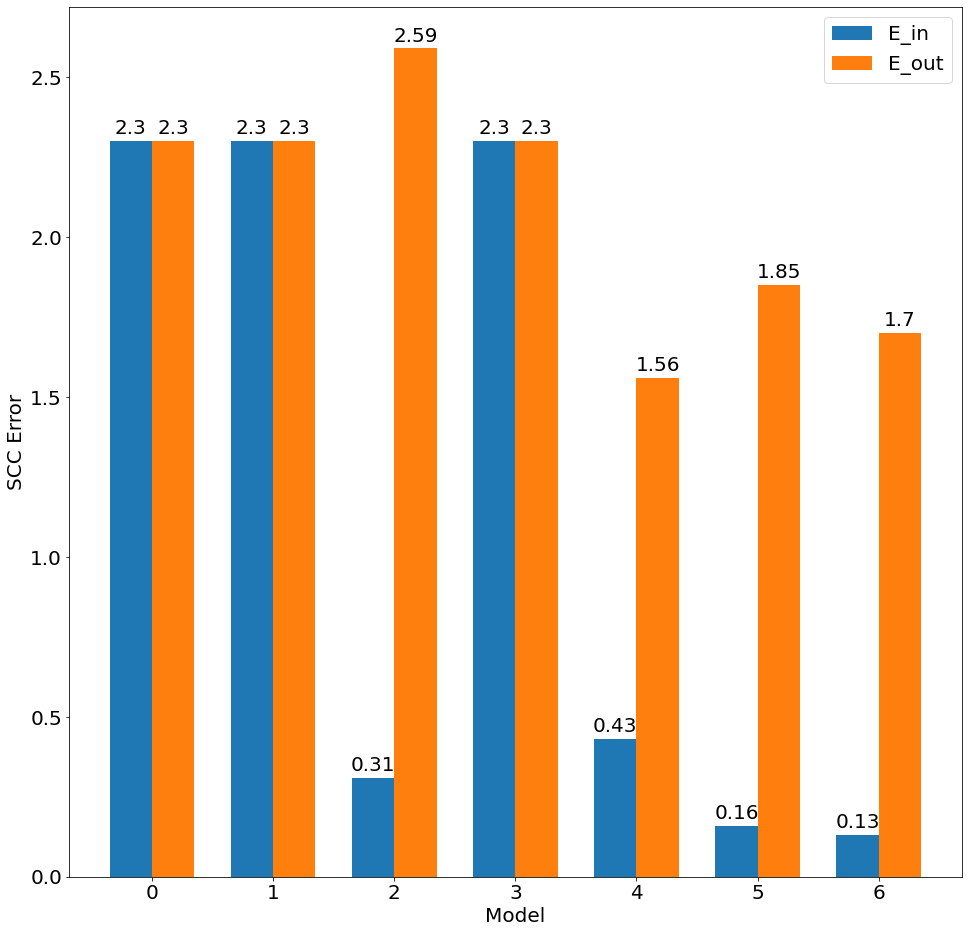

In [10]:
x = np.arange(len(model_errors))
width = 0.35

fig, ax = plt.subplots(figsize=(16,16))
ax.set_ylabel("SCC Error")
ax.set_xlabel("Model")
r1 = ax.bar(x-width/2, [round(e, 2) for e in model_train_errors], width, label="E_in")
r2 = ax.bar(x+width/2, [round(e, 2) for e in model_errors], width, label="E_out")
ax.bar_label(r1, padding=3)
ax.bar_label(r2, padding=3)
ax.legend()

plt.show()
fig.savefig(f"Figures/cp1_fig1_model_e{epochs}_errbars.png")

# generate confusion matrix to see how much our models predict what number
#tf.math.confusion_matrix(model_val_preds[1].argmax(axis=1), y_val.flatten())

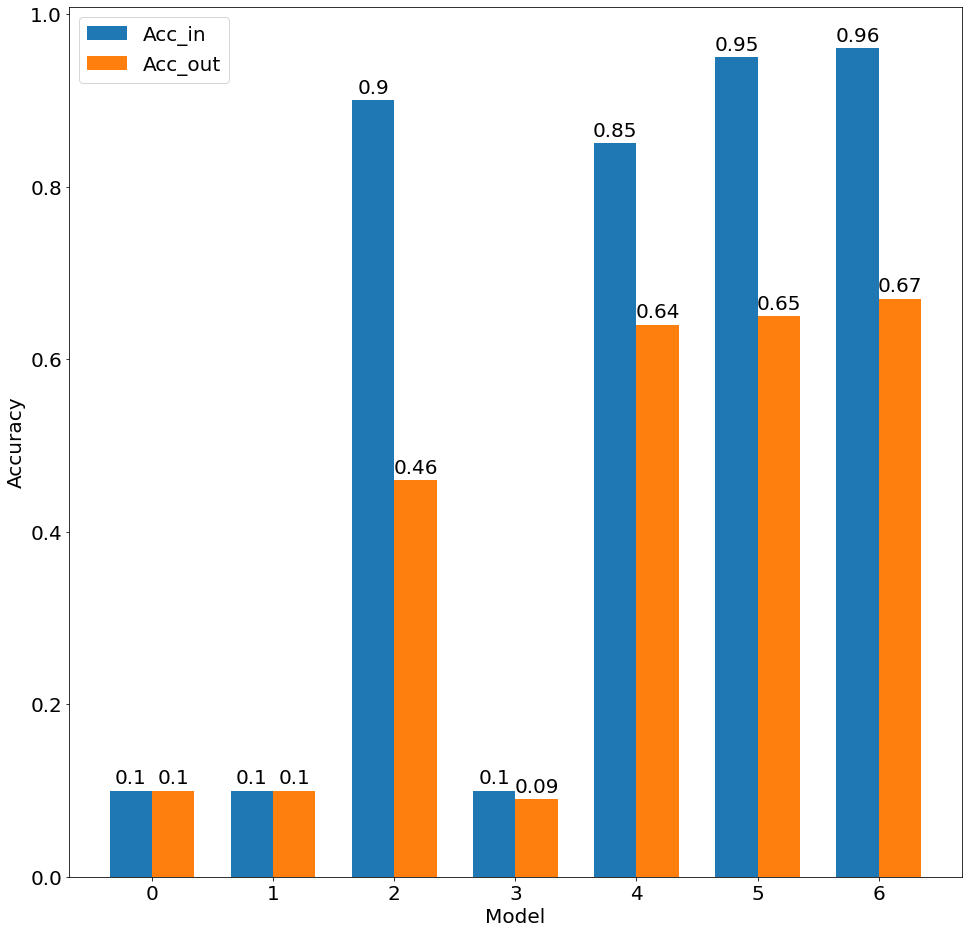

In [11]:
x = np.arange(len(model_errors))
width = 0.35

fig, ax = plt.subplots(figsize=(16,16))
ax.set_ylabel("Accuracy")
ax.set_xlabel("Model")
r1 = ax.bar(x-width/2, [round(e, 2) for e in model_train_acc], width, label="Acc_in")
r2 = ax.bar(x+width/2, [round(e, 2) for e in model_acc], width, label="Acc_out")
ax.bar_label(r1, padding=3)
ax.bar_label(r2, padding=3)
ax.legend()

plt.show()
fig.savefig(f"Figures/cp1_fig2_model_e{epochs}_accbars.png")


## 